Daily Challenge: Logistic Regression for Admission Prediction

Your Task
Data Exploration: Load and visualize the data.

Use pandas to load the dataset and examine the first few rows.
Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.
Applying Logistic Regression with scikit-learn:

Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
Train the logistic regression model on your dataset.
Making Predictions:

Use the trained logistic regression model to make predictions on your dataset.
Calculate the accuracy of your model.
Model Evaluation:

Interpret the result of logistic regression and the accuracy of your model.

In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("ex2data1.txt", header=None)

In [17]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
df.tail()

,0,1,2
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [20]:
print(df.describe())

                0           1           2
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [21]:
df.info("ex2data1.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [22]:
print(df.describe())

                0           1           2
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


La colonne 0 donne la liste des 99 entrées de notes sur 100.
La colonne 1 donne la liste des 99 entrées de notes sur 100
La colonne 2 donne les résultats des étudiants sous la forme 0 (non admis) ou 1 (Admis)
Les colonnes de données sont numériques

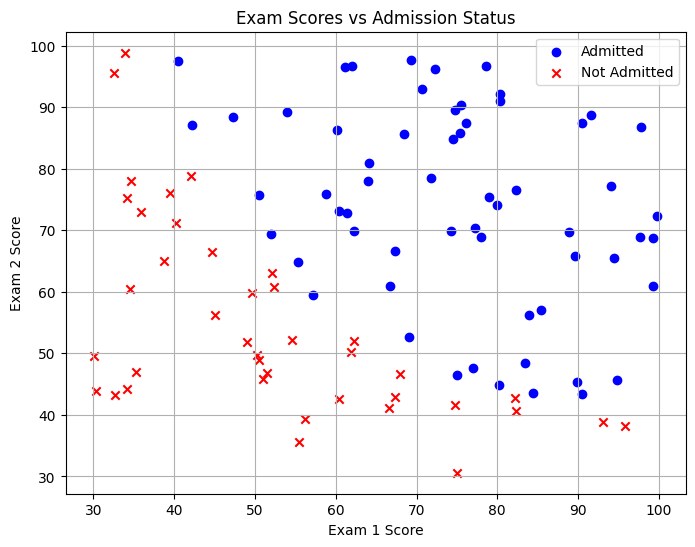

In [25]:
# Renommer les colonnes pour plus de clarté (optionnel mais recommandé)
df.columns = ['Exam 1 Score', 'Exam 2 Score', 'Admitted']

# Séparer les étudiants admis et non admis
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

# Création du scatter plot
plt.figure(figsize=(8,6))
plt.scatter(admitted['Exam 1 Score'], admitted['Exam 2 Score'], c='b', marker='o', label='Admitted')
plt.scatter(not_admitted['Exam 1 Score'], not_admitted['Exam 2 Score'], c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Exam Scores vs Admission Status')
plt.legend()
plt.grid(True)
plt.show()

Ce tableau illustre l'éparpillement des notes des élèves admis et non admis

In [4]:
df = pd.read_csv("ex2data1.txt", header=None)
df.columns = ['Exam1', 'Exam2', 'Admitted']

In [6]:
# Préparation des données
X = df[['Exam1', 'Exam2']].values
y = df['Admitted'].values

In [7]:
# Entraînement du modèle
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


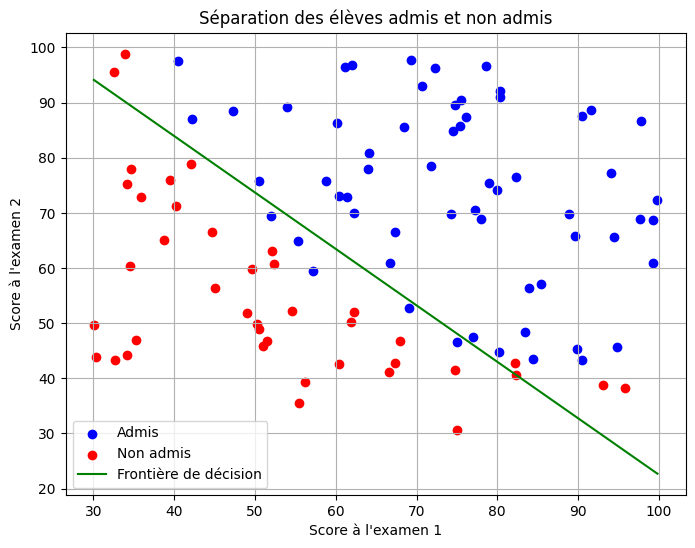

In [8]:
# Créer les points pour la droite de décision
x_values = np.linspace(df['Exam1'].min(), df['Exam1'].max(), 100)
# Formule de la droite : w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1) / w2
y_values = -(model.intercept_[0] + model.coef_[0][0] * x_values) / model.coef_[0][1]

# Tracer les données et la frontière
plt.figure(figsize=(8,6))
plt.scatter(df[df['Admitted'] == 1]['Exam1'], df[df['Admitted'] == 1]['Exam2'], c='blue', label='Admis')
plt.scatter(df[df['Admitted'] == 0]['Exam1'], df[df['Admitted'] == 0]['Exam2'], c='red', label='Non admis')
plt.plot(x_values, y_values, label='Frontière de décision', color='green')
plt.xlabel("Score à l'examen 1")
plt.ylabel("Score à l'examen 2")
plt.title("Séparation des élèves admis et non admis")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# Charger les données
df = pd.read_csv("ex2data1.txt", header=None)
df.columns = ['Exam1', 'Exam2', 'Admitted']

In [12]:
# Séparer les caractéristiques (X) et la cible (y)
X = df[['Exam1', 'Exam2']].values
y = df['Admitted'].values

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize Logistic Regression model
model = LogisticRegression()

In [30]:
# Fit the model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
# Predict on test data
y_pred = model.predict(X_test)

In [33]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Accuracy equals to 1.0, cvlasses are balanced, the model correctly predicted admission status.